In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# Data loading
df = pd.read_csv(r'synthetic_debt_collection_advanced.csv')

In [121]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   case_id                  20000 non-null  int64  
 1   client_id                20000 non-null  int64  
 2   client_age               20000 non-null  int64  
 3   client_gender            20000 non-null  object 
 4   income_level             20000 non-null  object 
 5   employment_status        20000 non-null  object 
 6   has_mortgage             20000 non-null  int64  
 7   has_other_loans          20000 non-null  int64  
 8   risk_segment             20000 non-null  object 
 9   principal_amount         20000 non-null  float64
 10  interest_rate            20000 non-null  float64
 11  fees_amount              20000 non-null  float64
 12  total_debt               20000 non-null  float64
 13  days_overdue             20000 non-null  int64  
 14  age_of_debt_days      

In [122]:
pd.set_option('display.max_columns', None)
df.head()

,case_id,client_id,client_age,client_gender,income_level,employment_status,has_mortgage,has_other_loans,risk_segment,principal_amount,interest_rate,fees_amount,total_debt,days_overdue,age_of_debt_days,product_type,channel_origin,num_previous_cases,num_open_cases,num_calls_last_30d,num_sms_last_30d,num_emails_last_30d,payment_promises,broken_promises,last_contact_days_ago,previous_payments_count,previous_payments_sum,region,urban_rural,will_pay_90d,amount_paid_90d,paid_in_full_180d
0,1,893,20,F,low,retired,0,1,C,10892.12,0.158,1377.96,13991.03,395,743,loan,call_center,0,1,4,2,1,0,0,43,1,260.73,east,rural,0,0.00,0
1,2,7740,62,F,medium,employed,0,1,A,10842.90,0.087,1226.51,13012.74,110,193,telco,call_center,1,2,3,0,1,0,0,31,4,2632.84,south,rural,1,3641.56,0
2,3,6546,31,M,high,unemployed,1,0,C,17766.80,0.076,1335.75,20452.83,652,870,credit_card,online,0,1,6,1,1,0,0,33,0,0.00,central,urban,0,0.00,0
3,4,4389,62,F,low,employed,0,0,B,2197.81,0.131,198.07,2683.79,695,1013,loan,partner,0,1,3,2,0,2,1,42,4,2781.92,south,urban,1,1483.65,1
4,5,4331,53,F,low,employed,0,1,D,10664.71,0.267,1173.77,14685.96,191,209,utilities,online,1,1,4,0,1,1,0,20,1,920.50,north,urban,0,0.00,0


In [123]:
df.describe()

,case_id,client_id,client_age,has_mortgage,has_other_loans,principal_amount,interest_rate,fees_amount,total_debt,days_overdue,age_of_debt_days,num_previous_cases,num_open_cases,num_calls_last_30d,num_sms_last_30d,num_emails_last_30d,payment_promises,broken_promises,last_contact_days_ago,previous_payments_count,previous_payments_sum,will_pay_90d,amount_paid_90d,paid_in_full_180d
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,4965.424600,48.603300,0.502050,0.500700,10076.035375,0.174572,760.253565,12593.000289,358.070400,539.528650,0.499850,1.592800,2.992350,2.00100,0.992500,0.981100,0.586950,29.721000,1.001700,526.541686,0.197100,612.416195,0.126250
std,5773.647028,2882.032983,17.947321,0.500008,0.500012,5718.133600,0.072203,664.429809,7209.471648,208.390674,233.948912,0.706488,0.708247,1.741965,1.40716,0.995938,0.988833,0.764506,17.290891,1.007893,655.926993,0.397818,1776.775587,0.332139
min,1.000000,1.000000,18.000000,0.000000,0.000000,205.250000,0.050000,0.030000,242.900000,1.000000,8.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,2474.000000,33.000000,0.000000,0.000000,5097.047500,0.112000,207.322500,6342.385000,175.000000,358.000000,0.000000,1.000000,2.000000,1.00000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,4961.500000,49.000000,1.000000,1.000000,10050.365000,0.174000,568.825000,12565.240000,358.000000,535.000000,0.000000,1.000000,3.000000,2.00000,1.000000,1.000000,0.000000,30.000000,1.000000,320.765000,0.000000,0.000000,0.000000
75%,15000.250000,7448.500000,64.000000,1.000000,1.000000,15000.882500,0.237000,1162.825000,18652.465000,540.000000,721.000000,1.000000,2.000000,4.000000,3.00000,2.000000,2.000000,1.000000,45.000000,2.000000,814.287500,0.000000,0.000000,0.000000
max,20000.000000,10000.000000,79.000000,1.000000,1.000000,19999.080000,0.300000,2967.050000,28614.860000,719.000000,1079.000000,6.000000,3.000000,15.000000,10.00000,7.000000,8.000000,5.000000,59.000000,8.000000,5787.200000,1.000000,19856.700000,1.000000


In [124]:
# Check number of null in columns
df.isna().sum()

case_id                    0
client_id                  0
client_age                 0
client_gender              0
income_level               0
employment_status          0
has_mortgage               0
has_other_loans            0
risk_segment               0
principal_amount           0
interest_rate              0
fees_amount                0
total_debt                 0
days_overdue               0
age_of_debt_days           0
product_type               0
channel_origin             0
num_previous_cases         0
num_open_cases             0
num_calls_last_30d         0
num_sms_last_30d           0
num_emails_last_30d        0
payment_promises           0
broken_promises            0
last_contact_days_ago      0
previous_payments_count    0
previous_payments_sum      0
region                     0
urban_rural                0
will_pay_90d               0
amount_paid_90d            0
paid_in_full_180d          0
dtype: int64

In [125]:
# Preview numerical columns
df.select_dtypes(include=['float64','int64']).head(20)

,case_id,client_id,client_age,has_mortgage,has_other_loans,principal_amount,interest_rate,fees_amount,total_debt,days_overdue,age_of_debt_days,num_previous_cases,num_open_cases,num_calls_last_30d,num_sms_last_30d,num_emails_last_30d,payment_promises,broken_promises,last_contact_days_ago,previous_payments_count,previous_payments_sum,will_pay_90d,amount_paid_90d,paid_in_full_180d
0,1,893,20,0,1,10892.12,0.158,1377.96,13991.03,395,743,0,1,4,2,1,0,0,43,1,260.73,0,0.00,0
1,2,7740,62,0,1,10842.90,0.087,1226.51,13012.74,110,193,1,2,3,0,1,0,0,31,4,2632.84,1,3641.56,0
2,3,6546,31,1,0,17766.80,0.076,1335.75,20452.83,652,870,0,1,6,1,1,0,0,33,0,0.00,0,0.00,0
3,4,4389,62,0,0,2197.81,0.131,198.07,2683.79,695,1013,0,1,3,2,0,2,1,42,4,2781.92,1,1483.65,1
4,5,4331,53,0,1,10664.71,0.267,1173.77,14685.96,191,209,1,1,4,0,1,1,0,20,1,920.50,0,0.00,0
5,6,8586,30,1,1,2753.14,0.137,120.61,3250.93,149,424,0,2,3,0,1,0,0,58,0,0.00,0,0.00,0
6,7,860,47,1,0,2669.27,0.189,51.69,3225.45,141,306,0,2,6,3,0,0,0,52,0,0.00,0,0.00,0
7,8,6974,20,0,1,12790.80,0.245,332.22,16256.77,478,842,0,1,1,2,1,2,2,28,0,0.00,0,0.00,0
8,9,2015,61,1,0,1434.33,0.175,82.86,1768.20,450,454,1,3,2,1,1,0,0,16,0,0.00,0,0.00,0
9,10,942,36,0,0,5224.26,0.289,16.62,6750.69,715,1009,2,1,2,3,1,2,0,11,0,0.00,0,0.00,0


In [132]:
# Quick visual check of differences between paying and non-paying customers
non_payers = df[df['will_pay_90d'] == 0]
non_payers[['days_overdue','previous_payments_sum','previous_payments_count','payment_promises','broken_promises','num_calls_last_30d','interest_rate']].describe()

,days_overdue,previous_payments_sum,previous_payments_count,payment_promises,broken_promises,num_calls_last_30d,interest_rate
count,16058.000000,16058.000000,16058.000000,16058.00000,16058.000000,16058.000000,16058.000000
mean,372.312243,473.479752,0.928945,0.97235,0.593162,2.999751,0.175048
std,207.753924,604.574721,0.964459,0.98610,0.769957,1.739532,0.072204
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.050000
25%,194.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.112000
50%,379.000000,266.390000,1.000000,1.00000,0.000000,3.000000,0.174000
75%,554.000000,759.517500,1.000000,2.00000,1.000000,4.000000,0.238000
max,719.000000,4668.910000,7.000000,8.00000,5.000000,15.000000,0.300000


In [133]:
payers = df[df['will_pay_90d'] == 1]
payers[['days_overdue','previous_payments_sum','previous_payments_count','payment_promises','broken_promises','num_calls_last_30d','interest_rate']].describe()

,days_overdue,previous_payments_sum,previous_payments_count,payment_promises,broken_promises,num_calls_last_30d,interest_rate
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,300.055302,742.693019,1.298072,1.016743,0.561644,2.962202,0.172634
std,200.809003,797.417551,1.120586,0.999225,0.741444,1.751743,0.072173
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
25%,126.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.110000
50%,269.000000,547.315000,1.000000,1.000000,0.000000,3.000000,0.171500
75%,459.000000,1035.647500,2.000000,2.000000,1.000000,4.000000,0.234000
max,719.000000,5787.200000,8.000000,6.000000,4.000000,10.000000,0.300000


In [134]:
# Quick check of categorical features
object_columns = df.select_dtypes(include='object')
object_columns.head(20)

,client_gender,income_level,employment_status,risk_segment,product_type,channel_origin,region,urban_rural
0,F,low,retired,C,loan,call_center,east,rural
1,F,medium,employed,A,telco,call_center,south,rural
2,M,high,unemployed,C,credit_card,online,central,urban
3,F,low,employed,B,loan,partner,south,urban
4,F,low,employed,D,utilities,online,north,urban
5,M,medium,employed,A,utilities,online,west,urban
6,M,low,employed,C,loan,partner,east,rural
7,M,medium,employed,C,ecommerce,call_center,west,urban
8,F,low,retired,B,telco,online,central,rural
9,F,medium,employed,D,credit_card,call_center,west,urban


In [137]:
non_payers_object = non_payers.select_dtypes(include='object')
payers_object = payers.select_dtypes(include='object')

In [138]:
# check differences between payers and non_payers object data
for col in non_payers_object.columns:
    print(non_payers_object[col].value_counts(normalize=True))
    print(payers_object[col].value_counts(normalize=True))
    print('')

client_gender
F    0.500623
M    0.499377
Name: proportion, dtype: float64
client_gender
M    0.502283
F    0.497717
Name: proportion, dtype: float64

income_level
medium    0.442521
low       0.433740
high      0.123739
Name: proportion, dtype: float64
income_level
medium    0.499746
high      0.254947
low       0.245307
Name: proportion, dtype: float64

employment_status
employed         0.520115
unemployed       0.171379
retired          0.160979
self_employed    0.147528
Name: proportion, dtype: float64
employment_status
employed         0.673770
self_employed    0.153475
retired          0.106799
unemployed       0.065956
Name: proportion, dtype: float64

risk_segment
B    0.334039
C    0.314610
D    0.225495
A    0.125856
Name: proportion, dtype: float64
risk_segment
B    0.414003
A    0.239472
C    0.233384
D    0.113141
Name: proportion, dtype: float64

product_type
loan           0.353967
credit_card    0.202205
telco          0.194109
utilities      0.144601
ecommerce      0.

In [140]:
# analyze correlations between numerical features and will_pay_90d
correlation_matrix = df.select_dtypes(include=['float64','int64']).corr()
correlation_matrix['will_pay_90d'].sort_values(ascending=False)

                          case_id  client_id  client_age  has_mortgage  \
case_id                  1.000000  -0.003286   -0.004927     -0.001515   
client_id               -0.003286   1.000000    0.001459      0.016219   
client_age              -0.004927   0.001459    1.000000      0.001629   
has_mortgage            -0.001515   0.016219    0.001629      1.000000   
has_other_loans          0.002193   0.002602    0.017282     -0.000506   
principal_amount        -0.000810  -0.004634    0.009512      0.000415   
interest_rate            0.005370  -0.017390   -0.004528     -0.007457   
fees_amount             -0.006096  -0.002785    0.007109     -0.003261   
total_debt              -0.000878  -0.006442    0.008410     -0.001258   
days_overdue            -0.007200   0.001850   -0.003910     -0.001893   
age_of_debt_days        -0.008017   0.005377   -0.002294      0.000521   
num_previous_cases      -0.012104  -0.008749    0.006167     -0.012456   
num_open_cases          -0.002859   0.

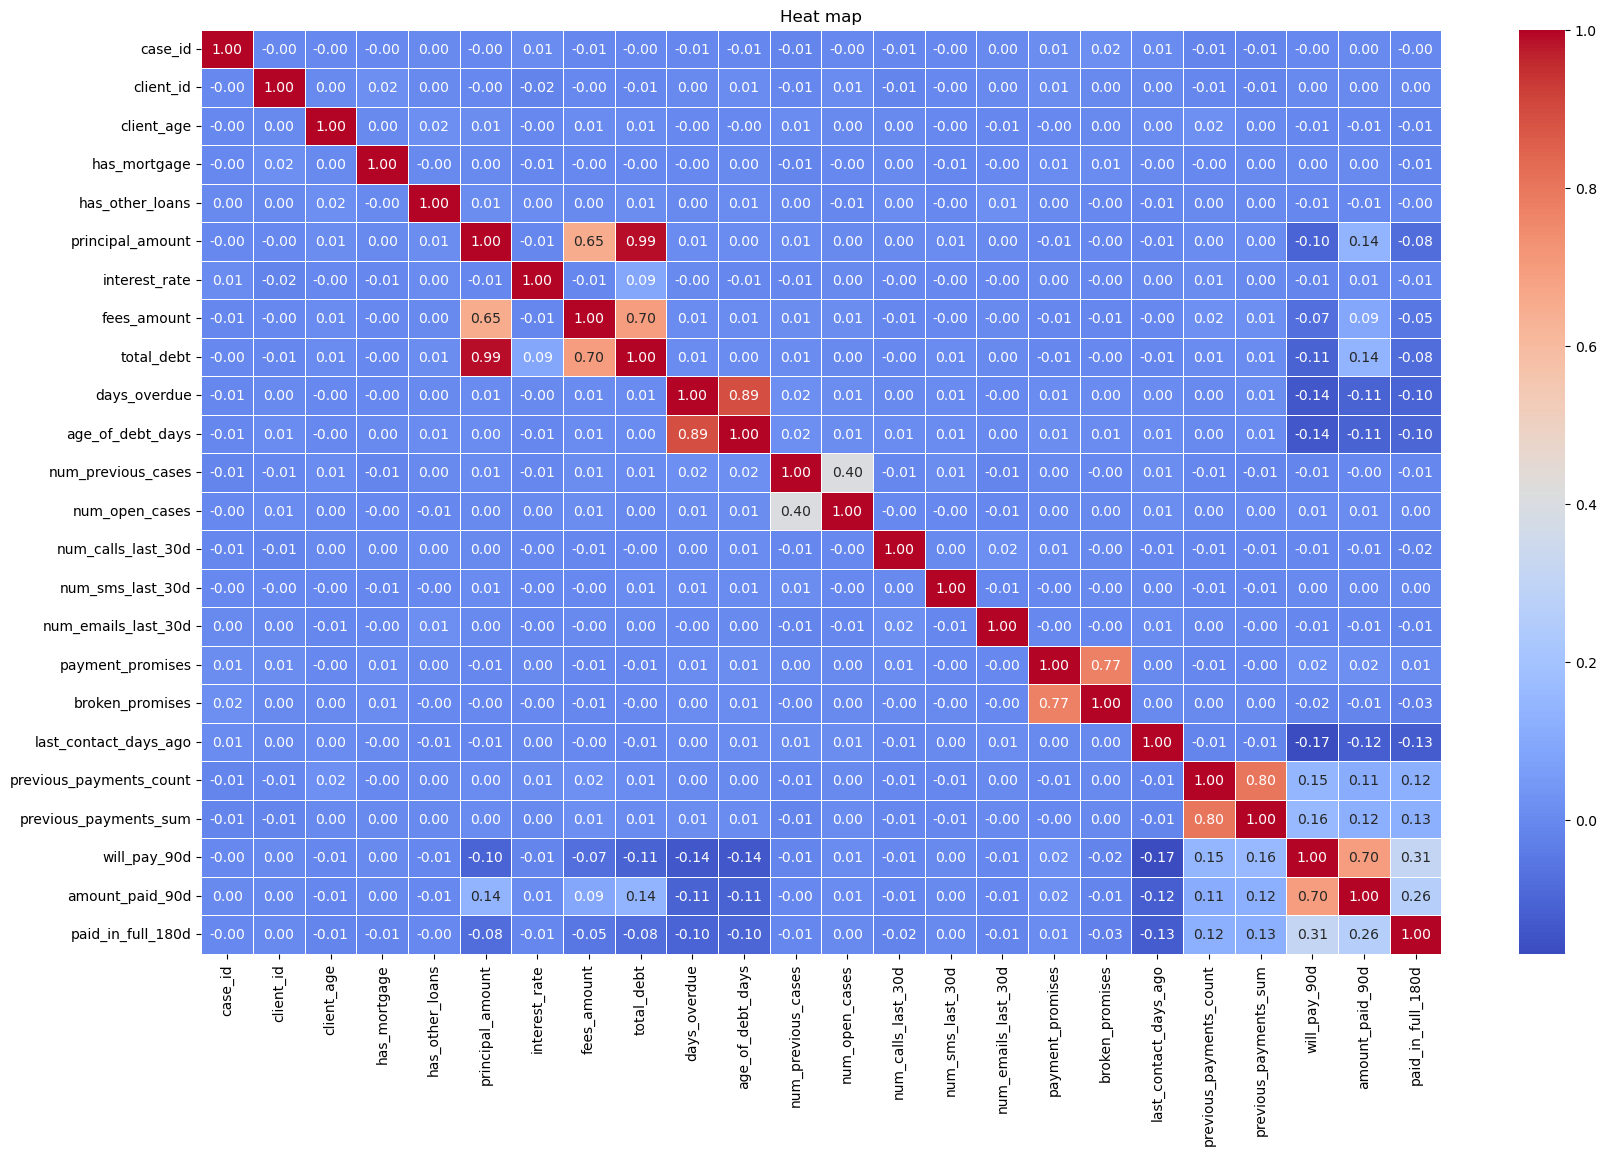

In [142]:
# visualize correlations between all numerical features
import seaborn as sns

matrix = df.select_dtypes(include=['float64','int64']).corr()

plt.figure(figsize=(20,12))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Heat map')
plt.show()

In [143]:
# drop columns with corelation more than 0.7 with other columns to reduce multicollinearity
data = df.drop(columns=['principal_amount','fees_amount','age_of_debt_days'])

In [144]:
# drop useless columns during creating model
model_data = data.drop(columns=['client_id','case_id','amount_paid_90d','paid_in_full_180d'])

In [147]:
# split data into features and target
target = model_data['will_pay_90d']
features = model_data.drop(columns=['will_pay_90d'])

In [154]:
# split features into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42, stratify=target)

In [160]:
# scaler numeric values to create better model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64','int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64','int64']))

In [161]:
# One hot encode categorical features
X_train_category = pd.get_dummies(X_train.select_dtypes(include=['object']), drop_first=True)
X_test_category = pd.get_dummies(X_test.select_dtypes(include=['object']), drop_first=True)

In [164]:
# check that both df include the same columns
X_train_category, X_test_category = X_train_category.align(X_test_category, join='outer', axis=1, fill_value=0)

In [165]:
# join categoriacl and numeric values
X_train_joined = np.hstack([X_train_category.values, X_train_scaled])
X_test_joined = np.hstack([X_test_category.values, X_test_scaled])

In [166]:
# create and train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_joined, y_train)

LogisticRegression(max_iter=1000)

In [167]:
# generate predict target
y_pred = model.predict(X_test_joined)

In [168]:
# create confusion matrix to check how model predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['True No pay', 'True Pay'], columns=['Pred No pay', 'Pred Pay'])
print(cm_df)

             Pred No pay  Pred Pay
True No pay         3090       122
True Pay             590       198


In [169]:
# create classification report to check how model workes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3212
           1       0.62      0.25      0.36       788

    accuracy                           0.82      4000
   macro avg       0.73      0.61      0.63      4000
weighted avg       0.80      0.82      0.79      4000



In [170]:
# train a second model with class balancing to improve recall for paying customers
second_model = LogisticRegression(max_iter=1000, class_weight='balanced')
second_model.fit(X_train_joined, y_train)
y_pred = second_model.predict(X_test_joined)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['True No pay', 'True Pay'], columns=['Pred No pay', 'Pred Pay'])
print(cm_df)

             Pred No pay  Pred Pay
True No pay         2315       897
True Pay             193       595


In [171]:
#check result for second model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      3212
           1       0.40      0.76      0.52       788

    accuracy                           0.73      4000
   macro avg       0.66      0.74      0.67      4000
weighted avg       0.82      0.73      0.75      4000



In [172]:
features_columns = (list(X_train_category.columns) + list(X_train.select_dtypes(include=['float64','int64']).columns))

In [173]:
# second model is accurate so I choose this one to print the most important features to predict
coef_df = pd.DataFrame({'feature': features_columns,'coef': second_model.coef_[0]}).sort_values('coef', ascending=False)

In [176]:
coef_df.head(10)

,feature,coef
36,previous_payments_sum,0.335102
11,product_type_telco,0.313757
12,product_type_utilities,0.308175
32,payment_promises,0.242752
35,previous_payments_count,0.151372
17,region_north,0.083057
18,region_south,0.082978
10,product_type_loan,0.078879
0,client_gender_M,0.076527
19,region_west,0.068946


In [177]:
coef_df.tail(10)

,feature,coef
25,total_debt,-0.351706
26,days_overdue,-0.428367
6,risk_segment_B,-0.477433
34,last_contact_days_ago,-0.519701
2,income_level_medium,-0.714499
3,employment_status_retired,-0.798915
7,risk_segment_C,-1.078907
5,employment_status_unemployed,-1.457749
8,risk_segment_D,-1.502616
1,income_level_low,-1.542147
